## 1.Introduction 

To investigate the potential bias that movie reviews site have, FiveThirtyEight compiled data for 147 films from 2015 that have substantive reviews from both critics and consumers. Every time Hollywood releases a movie, critics from Metacritic, Fandango, Rotten Tomatoes, and IMDB review and rate the film. They also ask the users in their respective communities to review and rate the film. Then, they calculate the average rating from both critics and users and display them on their site.

FiveThirtyEight compiled this dataset to investigate if there was any bias to Fandango's ratings. In addition to aggregating ratings for films, Fandango is unique in that it also sells movie tickets, and so it has a direct commercial interest in showing higher ratings.
<br>
<br>Instead of displaying the raw rating, the writer discovered that Fandango usually rounded the average rating to the next highest half star (next highest 0.5 value). The Fandango_Ratingvalue column reflects the true average rating while the Fandango_Stars column reflects the displayed, rounded rating.
<br>
<br>Let's read in this dataset, which allows us to compare how a movie fared across all 4 review sites.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

reviews = pd.read_csv('fandango_scores.csv')
norm_reviews = reviews[['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']]
print(norm_reviews[:1])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   

   IMDB_norm  Fandango_Ratingvalue  Fandango_Stars  
0        3.9                   4.5             5.0  


When we generated line charts, we passed in the data to pyplot.plot() and matplotlib took care of the rest. Because the markers and lines in a line chart correspond directly with x-axis and y-axis coordinates, all matplotlib needed was the data we wanted plotted.
<br>
<br>To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels. 

We'll focus on positioning the bars on the x-axis in this step and on positioning the x-axis labels in the next step. We can generate a vertical bar plot using either pyplot.bar() or Axes.bar(). 
<br>
<br>We'll use Axes.bar() so we can extensively customize the bar plot more easily. We can use pyplot.subplots() to first generate a single subplot and return both the Figure and Axes object. 
<br>
<br>This is a shortcut from the technique we used in the previous mission:

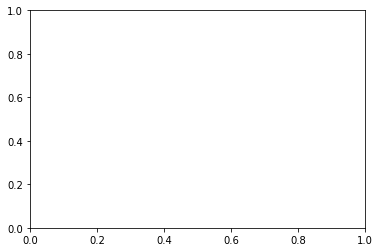

In [2]:
fig, ax = plt.subplots()

**The Axes.bar() method has 2 required parameters, left and height.** 
<br>
<br>We use the left parameter to specify the x coordinates of the left sides of the bar (marked in blue on the above image) (Note that recent versions of Matplotlib use a modified syntax, substituting the parameter xfor the parameter left). 
<br>
<br>We use the height parameter to specify the height of each bar. 
<br>**Both of these parameters accept a list-like object.**

At the same time, The np.arange() function returns evenly spaced values. We use arange() to generate the positions of the left side of our bars. This function requires a parameter that specifies the number of values we want to generate. 
<br>
<br>We can also add space between our bars for better readability, and also use the width parameter to specify the width of each bar.:

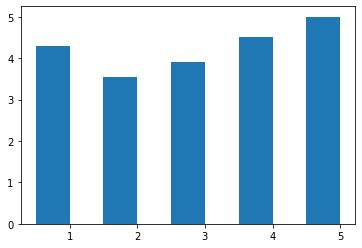

In [3]:

from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75

fig,ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
plt.show();

In the chart above, the x-axis 1,2,3,4,5 is confusing and it cannot deliver the insights
<br>
<br>By default, matplotlib sets the x-axis tick labels to the integer values the bars spanned on the x-axis (from 0 to 6). We only need tick labels on the x-axis where the bars are positioned.
<br>
<br>We can change the ticklabels as follows: 

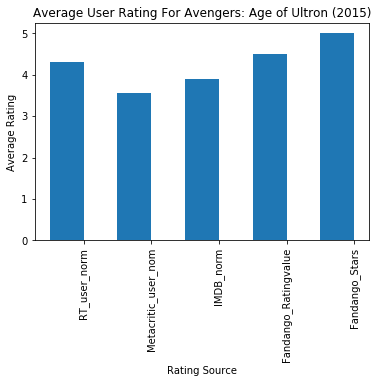

In [4]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75

#  Change the positions of the ticks to [1, 2, 3, 4, 5]
tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights,0.5)
ax.set_xticks(tick_positions)

#To specify the tick labels, at the same time specify the orientation for the labels using the rotation parameter
ax.set_xticklabels(num_cols, rotation=90)
ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
plt.title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

We can create a horizontal bar plot in matplotlib in a similar fashion. Instead of using Axes.bar(), we use Axes.barh(). This method has 2 required parameters, bottom and width. We use the bottom parameter to specify the y coordinate for the bottom sides for the bars and the width parameter to specify the lengths of the bars.
<br>
<br>To recreate the bar plot from the last step as horizontal bar plot, we essentially need to map the properties we set for the y-axis instead of the x-axis. We use Axes.set_yticks() to set the y-axis tick positions to [1, 2, 3, 4, 5] and Axes.set_yticklabels() to set the tick labels to the column names

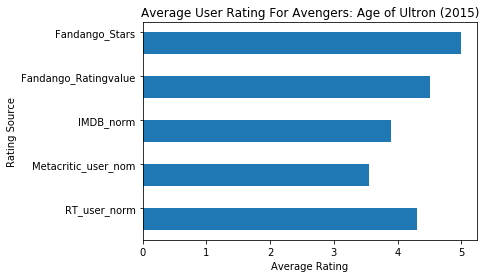

In [5]:
import matplotlib.pyplot as plt
from numpy import arange
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75

#  Change the positions of the ticks to [1, 2, 3, 4, 5]
tick_positions = range(1,6)

fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5)
ax.set_yticks(tick_positions)

#To specify the tick labels
ax.set_yticklabels(num_cols)
ax.set_ylabel('Rating Source')
ax.set_xlabel('Average Rating')
plt.title('Average User Rating For Avengers: Age of Ultron (2015)')

plt.show();

### Scatter plots 

A scatter plot helps us determine if 2 columns are weakly or strongly correlated. While calculating the correlation coefficient will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.
<br>
<br>To generate a scatter plot, we use Axes.scatter(). The scatter() method has 2 required parameters, x and y, which matches the parameters of the plot() method. The values for these parameters need to be iterable objects of matching lengths (lists, NumPy arrays, or pandas series).

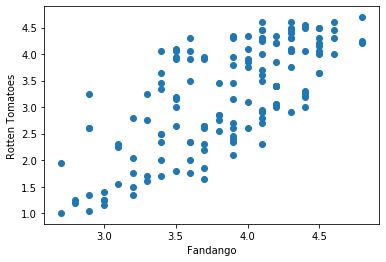

In [6]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel('Fandango')
ax.set_ylabel('Rotten Tomatoes')

plt.show();      

The scatter plot suggests that there's a weak, positive correlation between the user ratings on Fandango and the user ratings on Rotten Tomatoes. The correlation is weak because for many x values, there are multiple corresponding y values. The correlation is positive because, in general, as x increases, y also increases.
<br>
<br>If you want to instead understand how an independent variable affects a dependent variables, you want to put the independent one on the x-axis and the dependent one on the y-axis. Doing so helps emphasize the potential cause and effect relation.

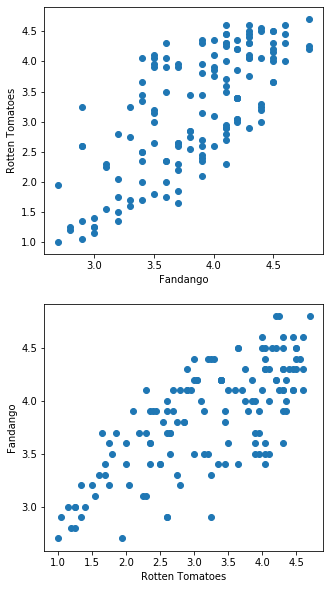

In [7]:
#Add 2 scatter plots in the same figure 

#Set up 2 plots 
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
reviews = pd.read_csv('fandango_scores.csv')
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
norm_reviews = reviews[cols]

#Specify 2 plots
ax1.scatter(reviews['Fandango_Ratingvalue'], reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax2.scatter(reviews['RT_user_norm'], reviews['Fandango_Ratingvalue'])
ax2.set_xlabel('Rotten Tomatoes')
ax2.set_ylabel('Fandango')

plt.show()

When generating multiple scatter plots for the purpose of comparison, it's important that all plots share the same ranges in the x-axis and y-axis. In the 2 plots we generated in the last step, the ranges for both axes didn't match. We can use Axes.set_xlim() and Axes.set_ylim() to set the data limits for both axes. 
<br>
<br>Example is as follows: 

In [8]:
ax.set_xlim(0, 5)
ax.set_ylim(0, 5)

(0, 5)

By default, matplotlib uses the minimal ranges for the data limits necessary to display all of the data we specify. By manually setting the data limits ranges to specific ranges for all plots, we're ensuring that we can accurately compare. 
<br>
<br>We can even use the methods we just mentioned to zoom in on a part of the plots. For example, the following code will limit the axes to the 4 to 5 range:

In [9]:
ax.set_xlim(4, 5)
ax.set_ylim(4, 5)

(4, 5)

This makes small changes in the actual values in the data appear larger in the plot. A difference of 0.1 in a plot that ranges from 0 to 5 is hard to visually observe. A difference of 0.1 in a plot that only ranges from 4 to 5 is easily visible since the difference is 1/10th of the range.

The example is as follows:

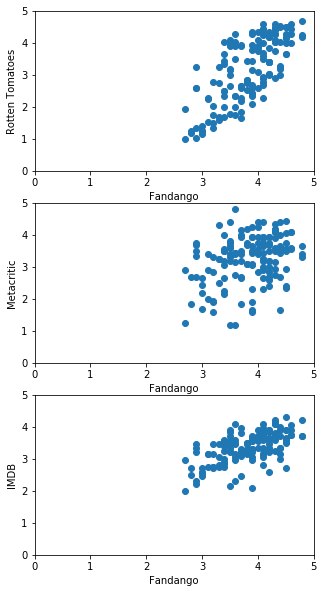

In [10]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel('Fandango')
ax1.set_ylabel('Rotten Tomatoes')
ax1.set_xlim(0, 5)
ax1.set_ylim(0, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel('Fandango')
ax2.set_ylabel('Metacritic')
ax2.set_xlim(0, 5)
ax2.set_ylim(0, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel('Fandango')
ax3.set_ylabel('IMDB')
ax3.set_xlim(0, 5)
ax3.set_ylim(0, 5)

plt.show()

### Historgam and box plots 

First is to select the columns we're going to work with 

In [11]:
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
norm_reviews = reviews[cols]
print(norm_reviews[:5])

                             FILM  RT_user_norm  Metacritic_user_nom  \
0  Avengers: Age of Ultron (2015)           4.3                 3.55   
1               Cinderella (2015)           4.0                 3.75   
2                  Ant-Man (2015)           4.5                 4.05   
3          Do You Believe? (2015)           4.2                 2.35   
4   Hot Tub Time Machine 2 (2015)           1.4                 1.70   

   IMDB_norm  Fandango_Ratingvalue  
0       3.90                   4.5  
1       3.55                   4.5  
2       3.90                   4.5  
3       2.70                   4.5  
4       2.55                   3.0  


Let's first compare the frequency distributions of user ratings from Fandango with those from IMDB using tables. A column's frequency distribution consists of the unique values in that column along with the count for each of those values (or their frequency). We can use Series.value_counts() to return the frequency distribution as Series object

In [12]:
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts()
fandango_distribution = fandango_distribution.sort_index()
print(fandango_distribution)

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64


In [13]:
imdb_distribution = norm_reviews['IMDB_norm'].value_counts()
imdb_distribution = imdb_distribution.sort_index()
print(imdb_distribution)

2.00     1
2.10     1
2.15     1
2.20     1
2.30     2
2.45     2
2.50     1
2.55     1
2.60     2
2.70     4
2.75     5
2.80     2
2.85     1
2.90     1
2.95     3
3.00     2
3.05     4
3.10     1
3.15     9
3.20     6
3.25     4
3.30     9
3.35     7
3.40     1
3.45     7
3.50     4
3.55     7
3.60    10
3.65     5
3.70     8
3.75     6
3.80     3
3.85     4
3.90     9
3.95     2
4.00     1
4.05     1
4.10     4
4.15     1
4.20     2
4.30     1
Name: IMDB_norm, dtype: int64


Comparing frequency distributions is challenging because the Fandango_Ratingvalue column contains 21 unique values while IMDB_norm contains 41 unique values. We need a way to compare frequencies across a shared set of values. 
<br>
<br>Because all ratings have been normalized to a range of 0 to 5, we can start by dividing the range of possible values into a series of fixed length intervals, called bins. We can then sum the frequencies for the values that fall into each bin.

We can generate a histogram using Axes.hist(). This method has only 1 required parameter, an iterable object containing the values we want a histogram for. By default, matplotlib will:
- Calculate the minimum and maximum value from the sequence of values we passed in
- Create 10 bins of equal length that span the range from the minimum to the maximum value
- Group unique values into bins 
- Sum up the associated unique values
- Generate a bar for the frequency sum for each bin

The default behavior of Axes.hist() is problematic for the use case of comparing distributions for multiple columns using the same binning strategy. This is because **the binning strategy for each column would depend on the minimum and maximum values, instead of a shared binning strategy**. 

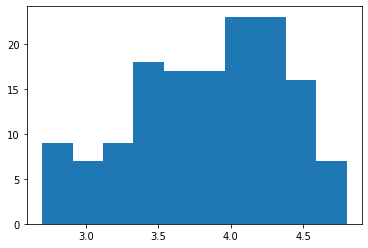

In [14]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'])
plt.show()

As we can see, the x-axis range starts at 2.5 because the minimum value is 2.7. 
<br>To do the comparison, we need to fix the x-axis range in all charts so as to see the difference in distribution. 

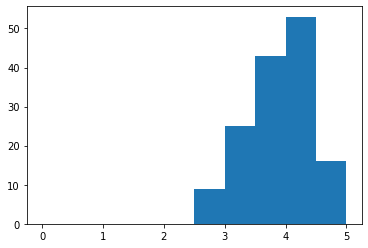

In [15]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0, 5))
plt.show()

If we want to further break down the number of bins, we can define the number of bins. 
<br>
<br>The example below generates couple of charts to compare the difference in different rating: 

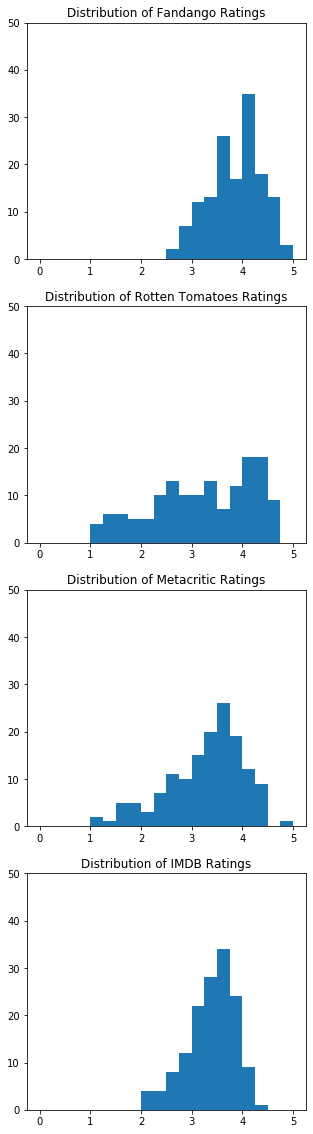

In [16]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'],20, range=(0,5) )
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)

ax2.hist(norm_reviews['RT_user_norm'],20,range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)

ax3.hist(norm_reviews['Metacritic_user_nom'],20,range=(0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)

ax4.hist(norm_reviews['IMDB_norm'], 20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)


plt.show()

While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites. The bottom 25% of values and top 25% of values both represent quartiles. The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.
<br>
<br>While these regions may sound similar to bins, they differ in how values are grouped into each region. Each bin covers an equal proportion of the values in the range. On the other hand, each quartile covers an equal number of values (1/4th of the total values). To visualize quartiles, we need to use a box plot, also referred to as a box-and-whisker plot.
<br>
<br>Below is the example: 

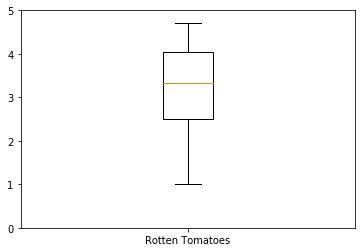

In [17]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0,5)
plt.show()